In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [123]:
df = pd.read_csv(r"C:\Users\svire\Downloads\wine.csv")

In [124]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [125]:
df['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [126]:
df.Type.unique()

array([1, 2, 3], dtype=int64)

In [127]:
df.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [128]:
df = df.drop('Type',axis=1)

In [129]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [131]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

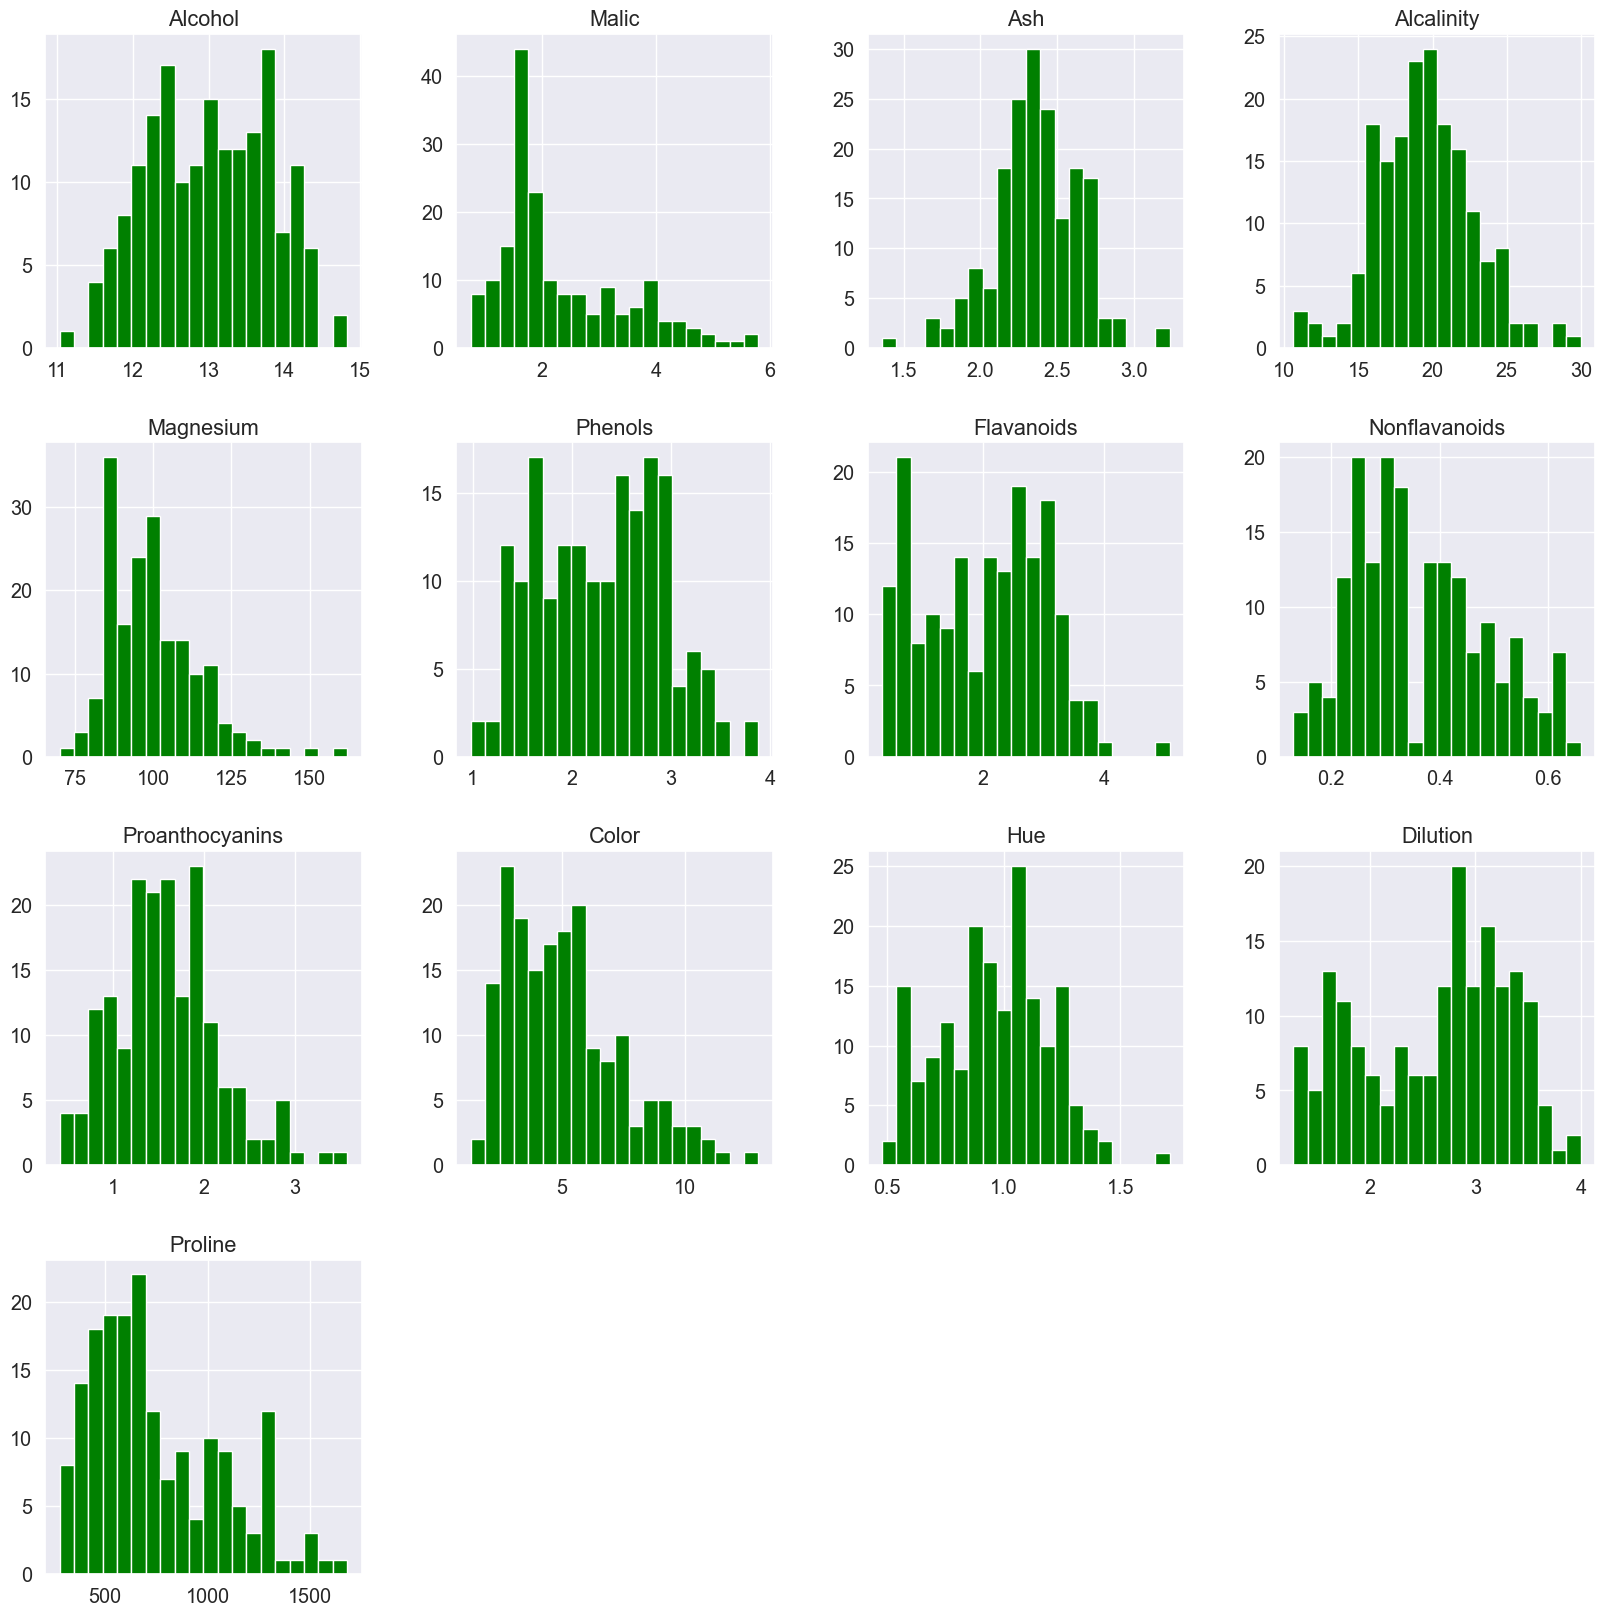

In [132]:
sns.set(style='dark',font_scale=1.3,rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='green')

In [133]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

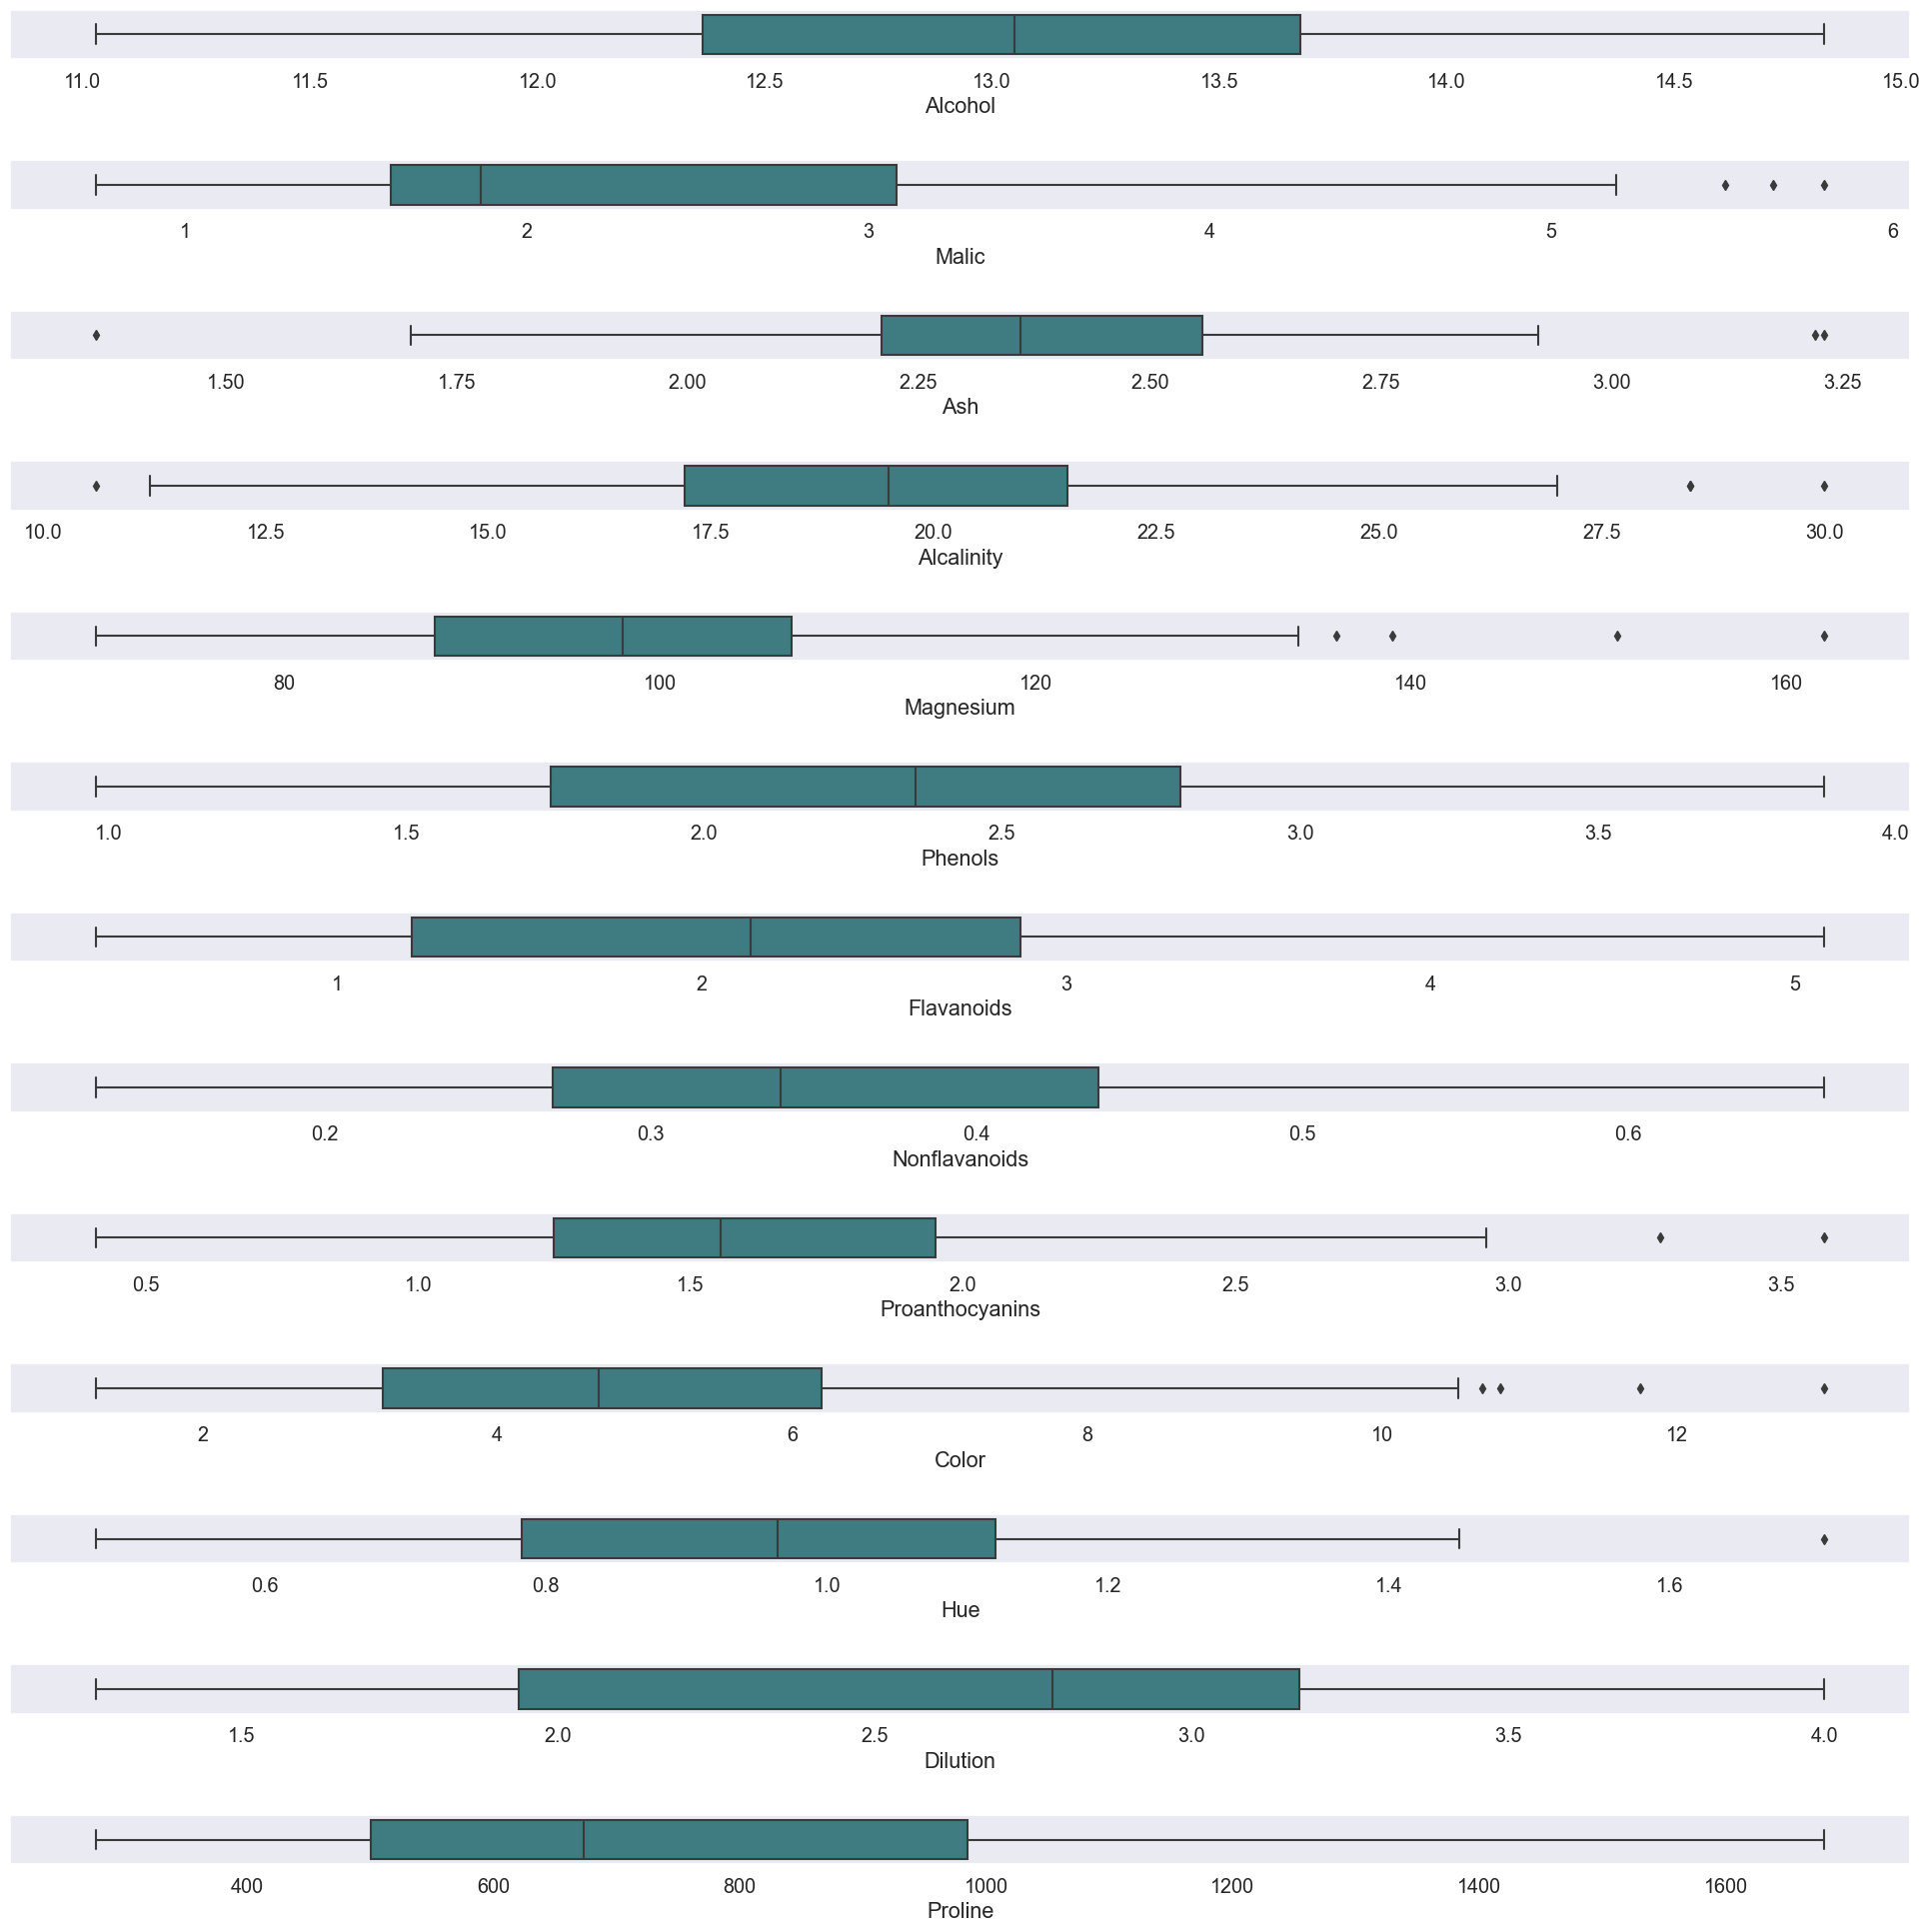

In [134]:
ot = df.copy()
fig,axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

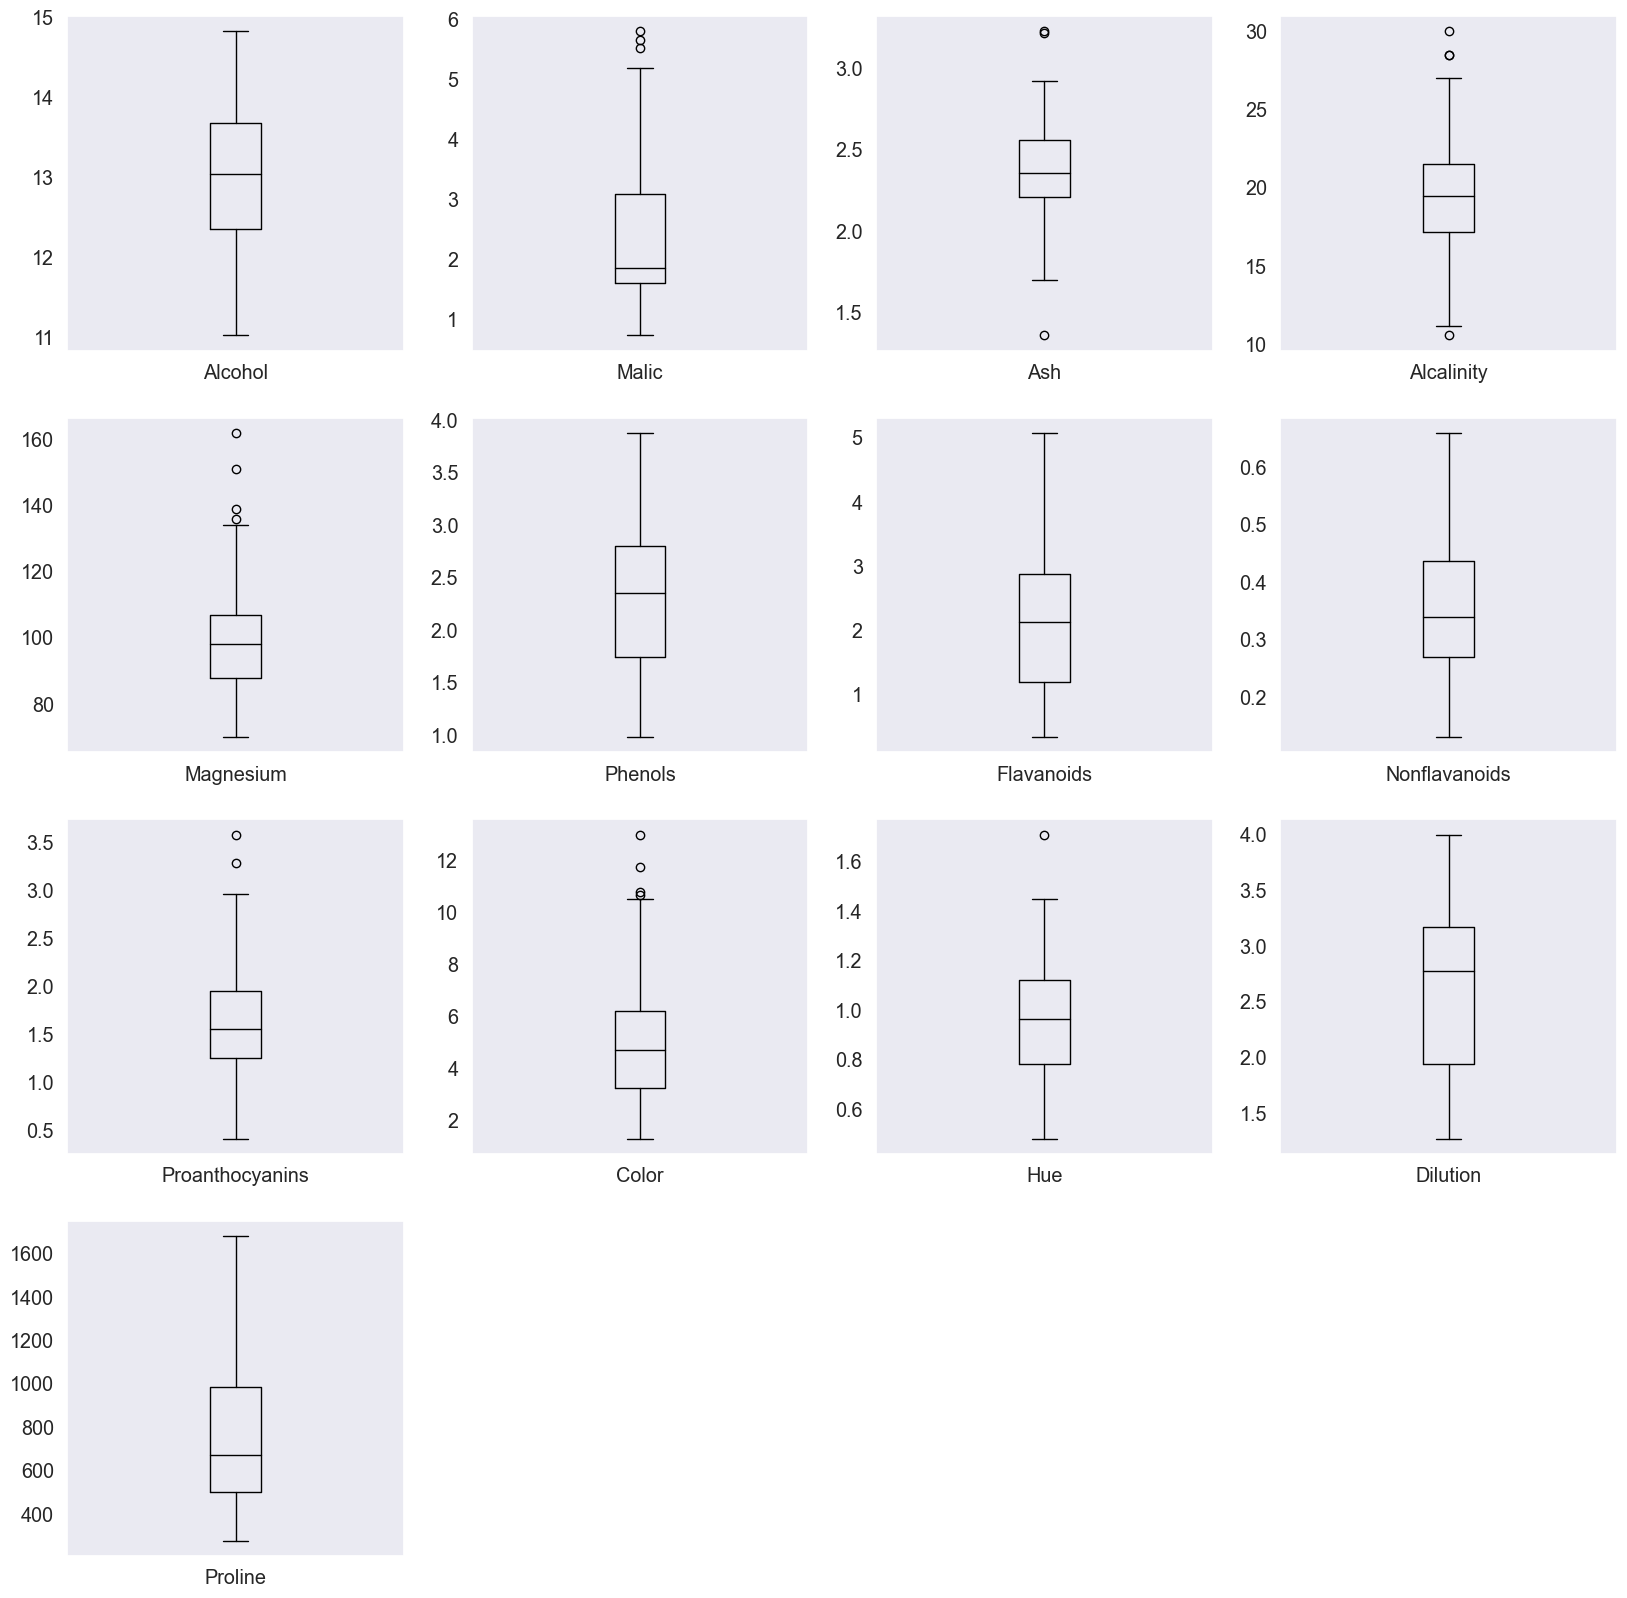

In [135]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,color='black')
plt.show()

In [136]:
import warnings
warnings.filterwarnings('ignore')

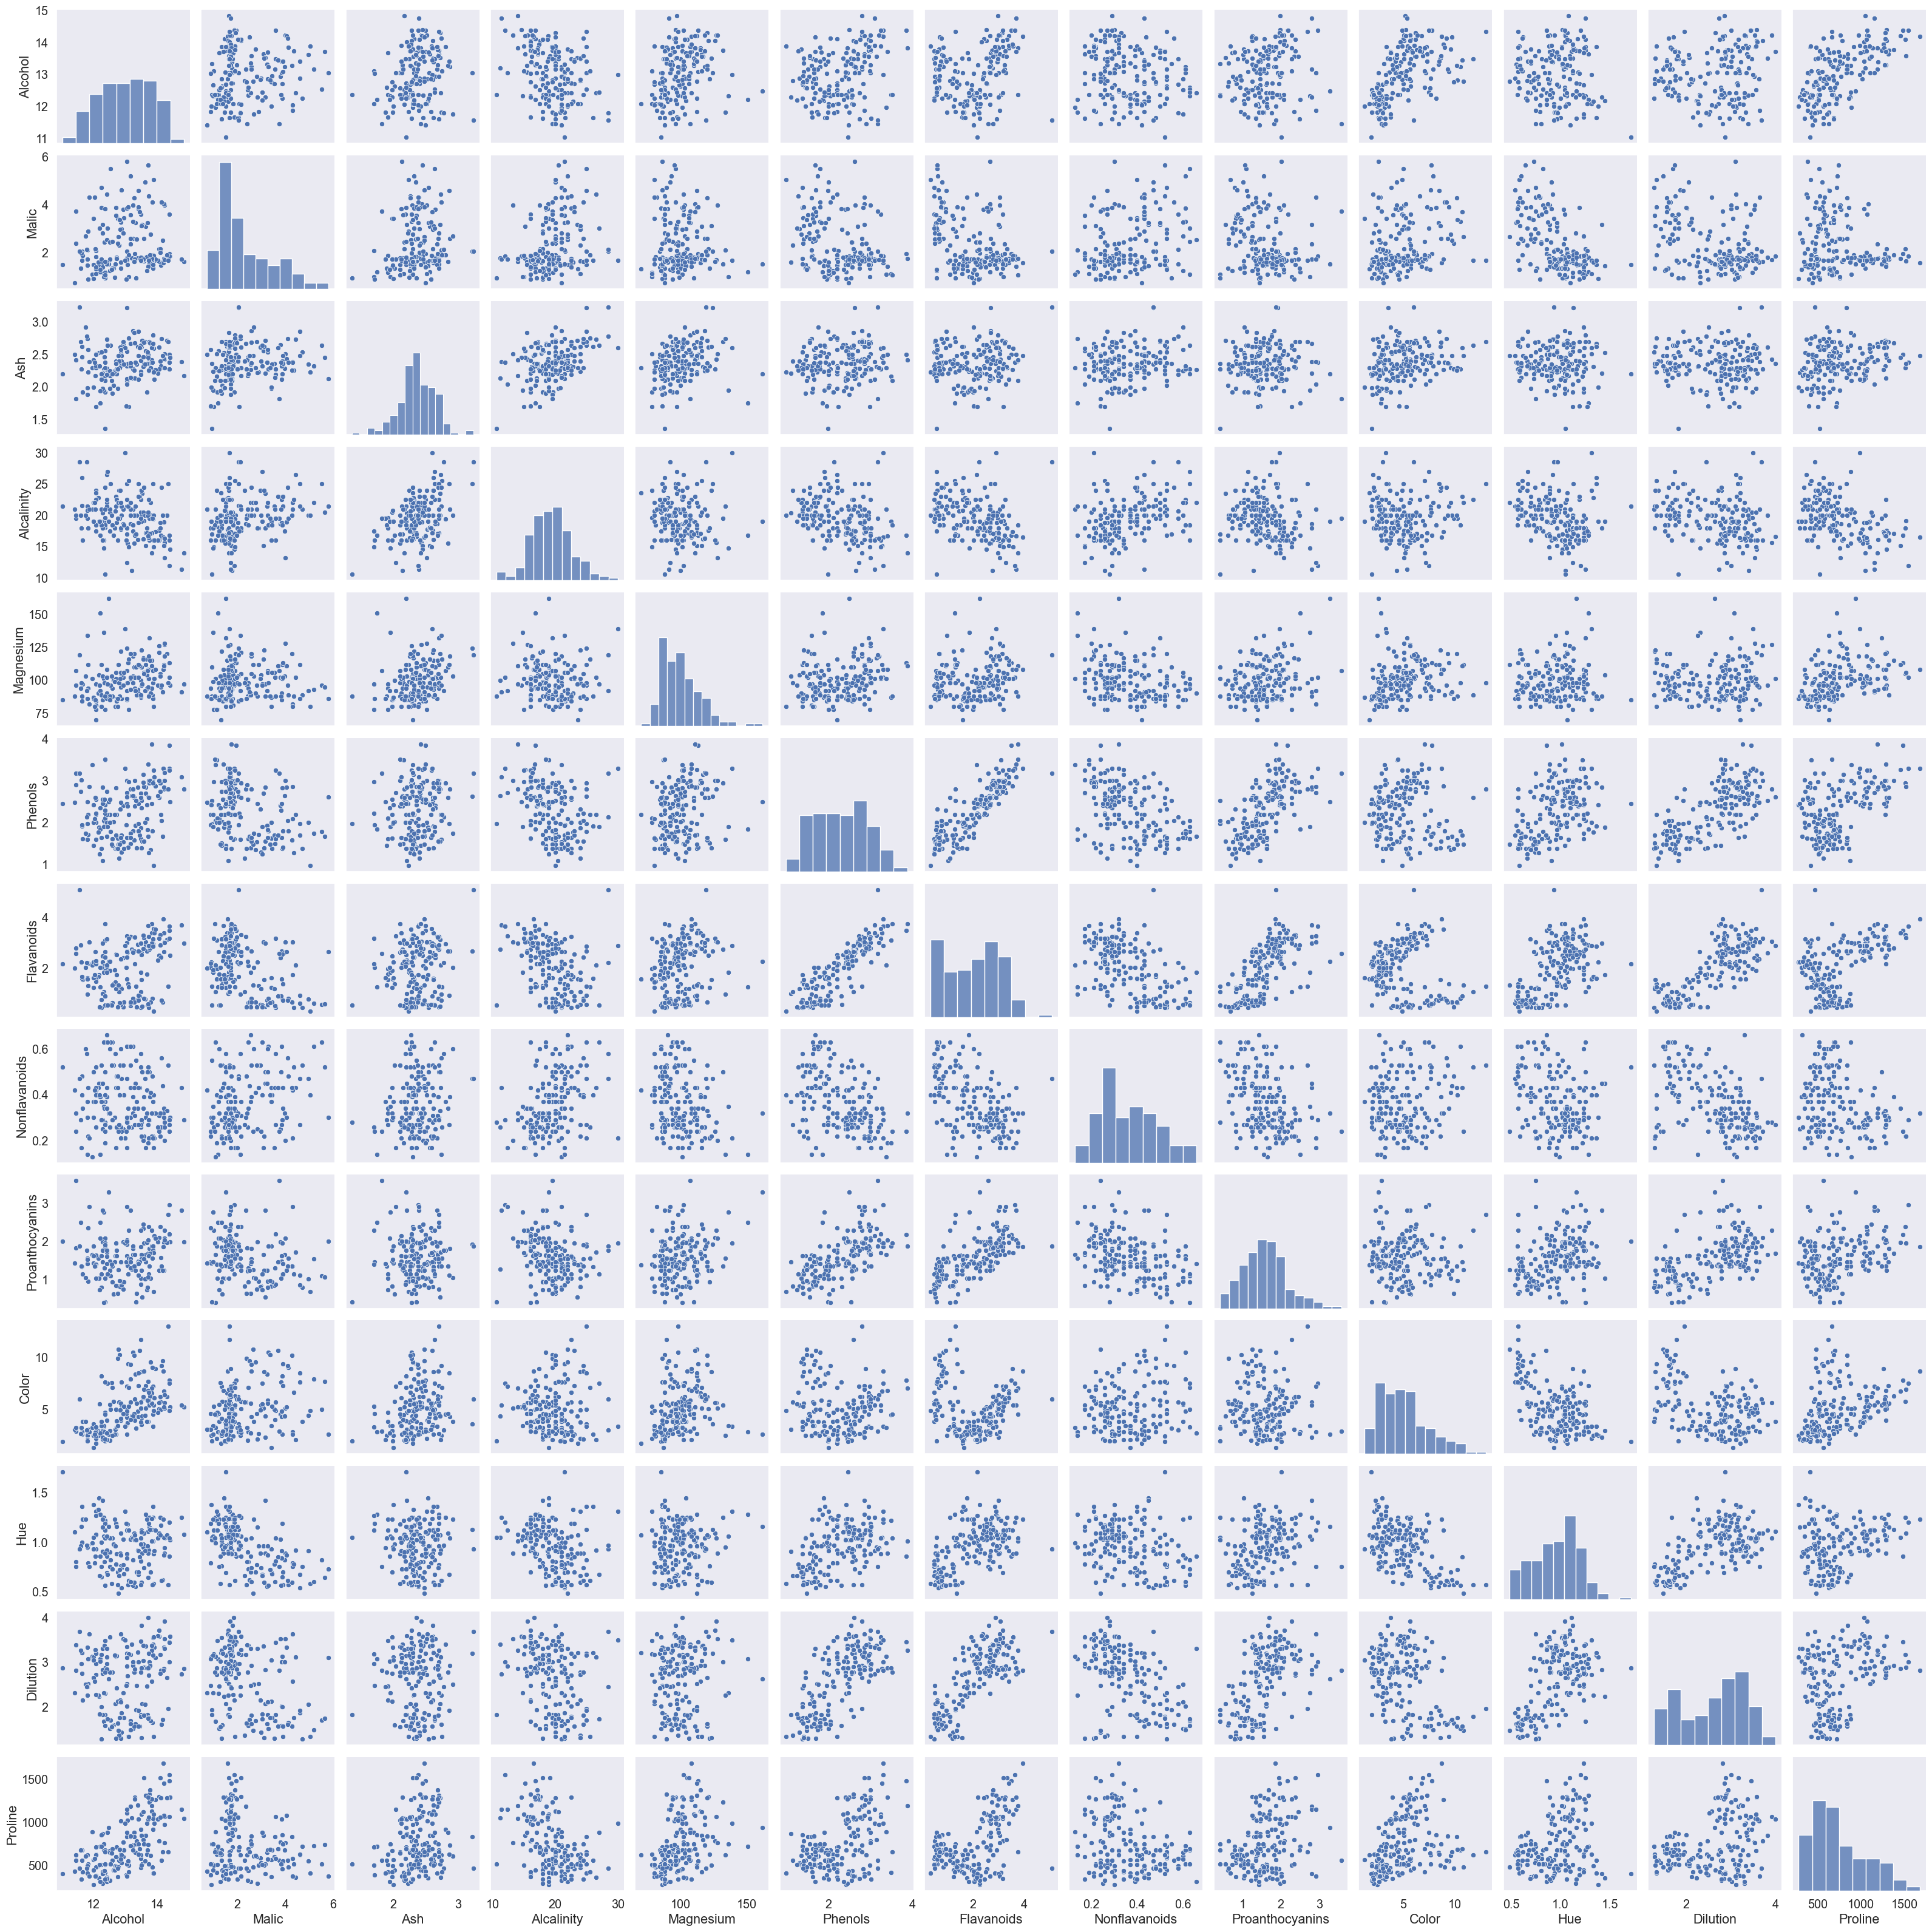

In [137]:
sns.pairplot(df,palette='dark')


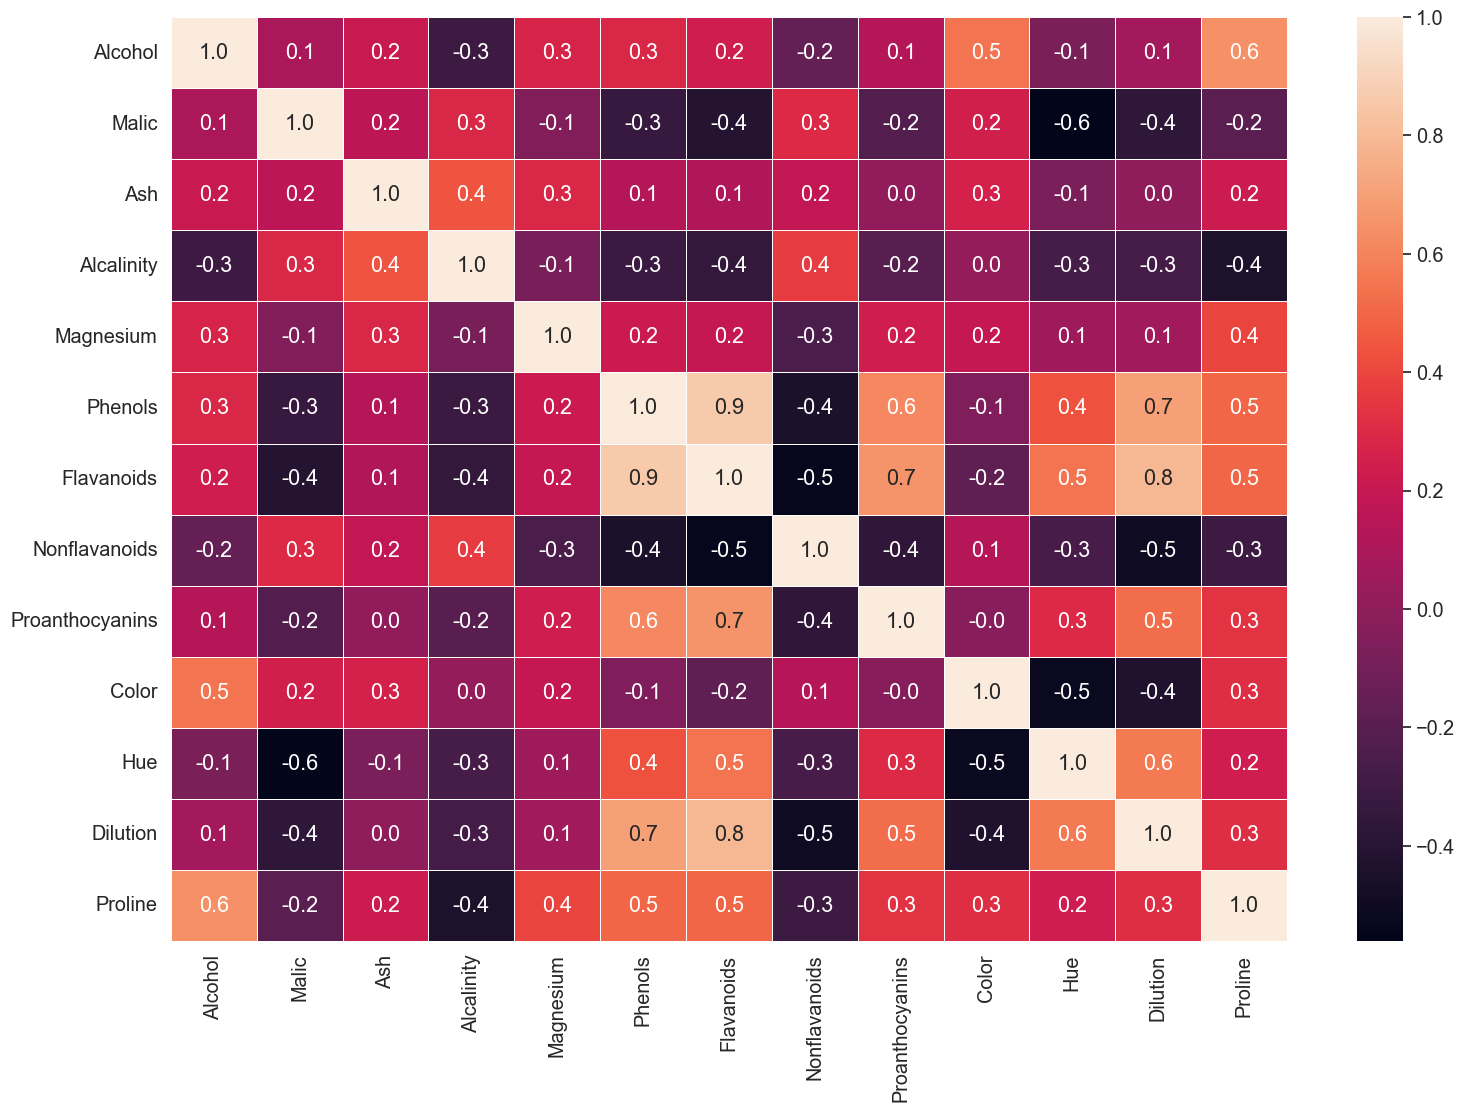

In [138]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

Text(0.5, 1.0, 'Data represented by the 2 strongest positively correlated features')

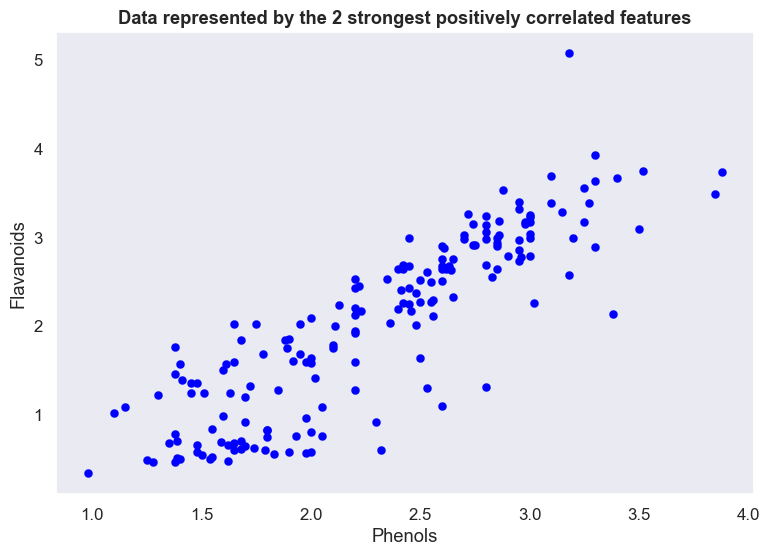

In [139]:
sns.set(style='dark',rc={'figure.figsize':(9,6)},font_scale=1.1)
plt.scatter(x=df['Phenols'],y=df['Flavanoids'],color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively correlated features',fontweight='bold')


In [140]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [141]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data,columns=['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])
scaled_data

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 13 columns]

In [142]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA(n_components=13)

In [144]:
principal_components = pca.fit_transform(scaled_data)

([<matplotlib.axis.XTick at 0x239f1e36a10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

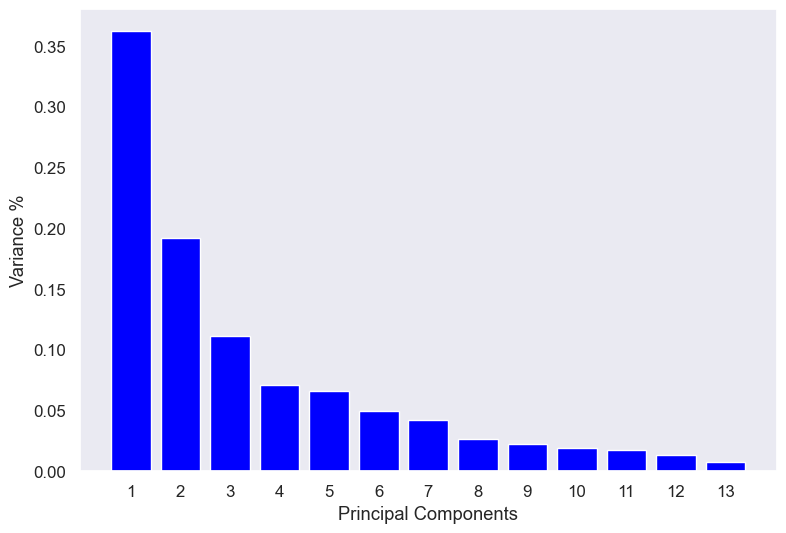

In [145]:
PC = range(1, pca.n_components_+1)
plt.bar(PC,pca.explained_variance_ratio_,color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

In [146]:
PCA_components = pd.DataFrame(principal_components)

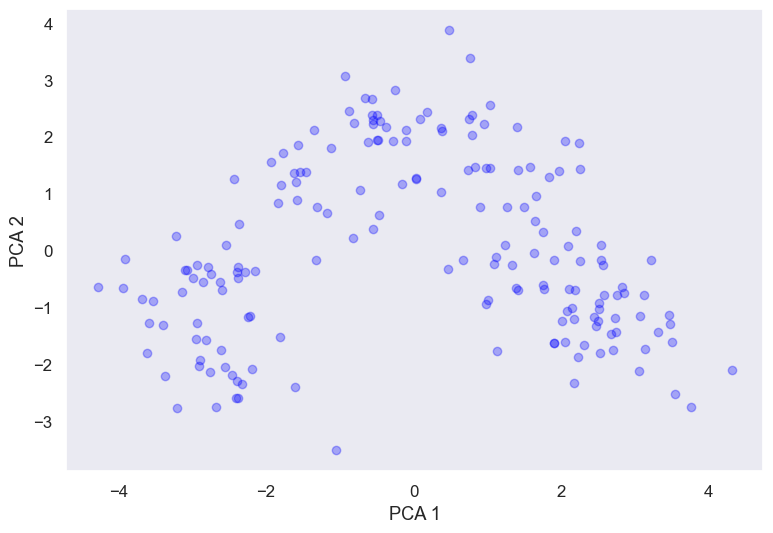

In [147]:
plt.scatter(PCA_components[0], PCA_components[1],alpha=.3,color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [148]:
wcss =[]

In [149]:
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)

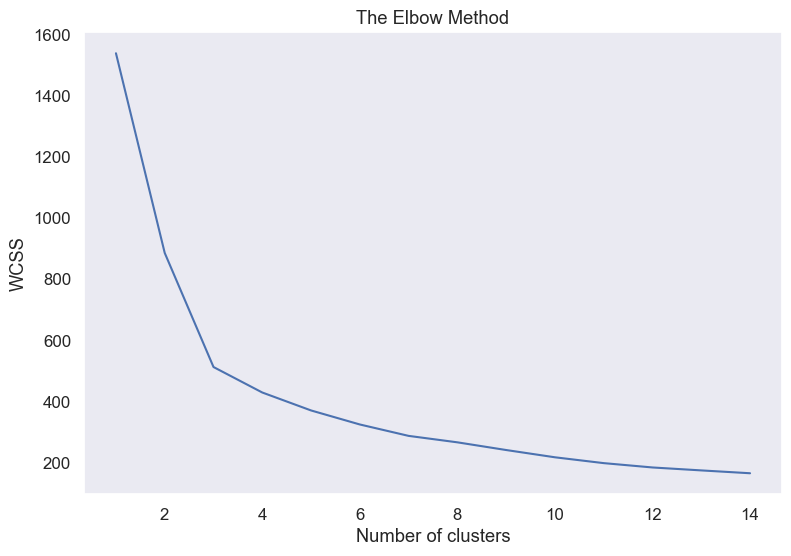

In [150]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [151]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3)

In [152]:

labels = model.predict(PCA_components.iloc[:,:2])

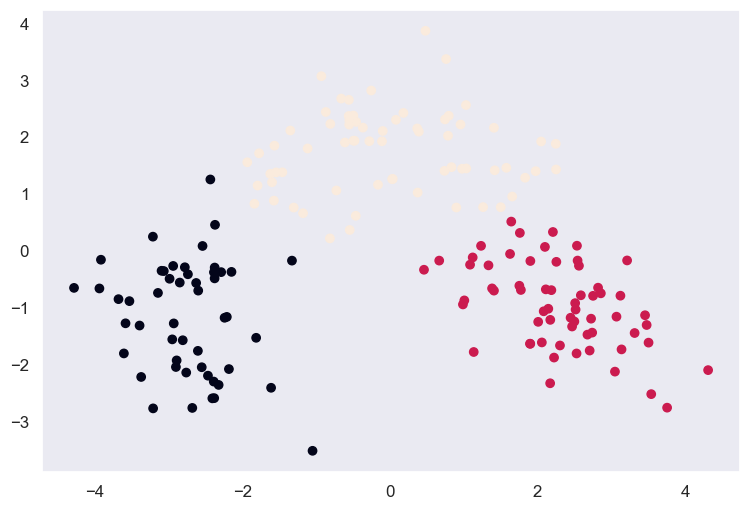

In [153]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [154]:

k_new_df=pd.DataFrame(principal_components[:,0:2])

In [155]:
model_k = KMeans(n_clusters=3)
model_k.fit(k_new_df)

KMeans(n_clusters=3)

In [156]:
model_k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [157]:
md=pd.Series(model_k.labels_)

In [158]:
df['clust']=md

In [159]:
k_new_df.head()

0         1
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831

In [160]:
df.groupby(df.clust).mean()

Alcohol     Malic       Ash  Alcalinity   Magnesium   Phenols  \
clust                                                                    
0      12.238308  1.931385  2.219385   19.898462   92.830769  2.204308   
1      13.659219  1.975781  2.463750   17.596875  107.312500  2.859688   
2      13.151633  3.344490  2.434694   21.438776   99.020408  1.678163   

       Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  \
clust                                                                   
0        1.989231       0.365538         1.587692  2.992615  1.051631   
1        3.012656       0.290000         1.921719  5.406250  1.069688   
2        0.797959       0.450816         1.163061  7.343265  0.685918   

       Dilution      Proline  
clust                         
0      2.769231   506.353846  
1      3.157188  1082.562500  
2      1.690204   627.551020

### H Cluster

In [161]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [163]:
h_cluster = model2.fit(PCA_components.iloc[:,:2])

In [164]:
labels2 = model2.labels_

In [165]:
X = PCA_components.iloc[:,:1]
Y = PCA_components.iloc[:,1:2]

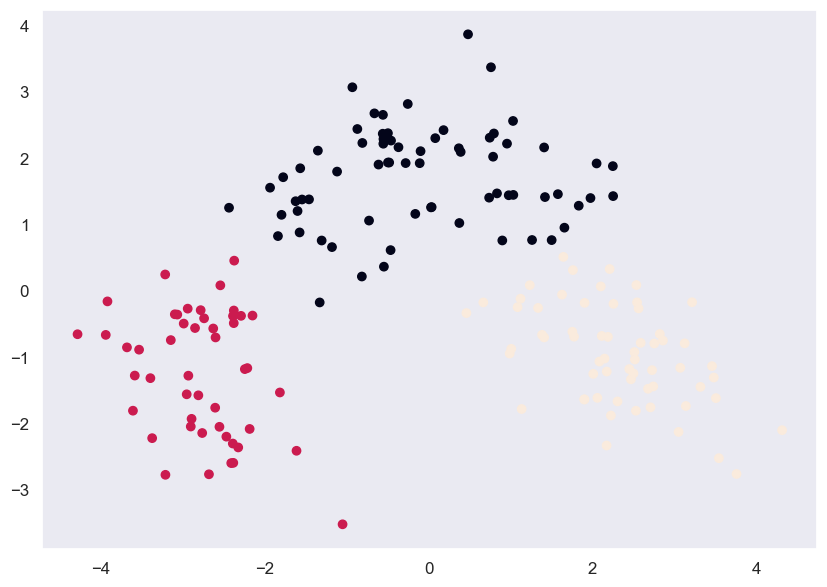

In [166]:
plt.figure(figsize=(10, 7))  
plt.scatter(X, Y, c=labels2) 

In [167]:
h_new_df=pd.DataFrame(principal_components[:,0:2])

In [168]:
h_new_df.head()

0         1
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831

In [169]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [170]:
hcf = linkage(h_new_df,method="complete",metric="euclidean")

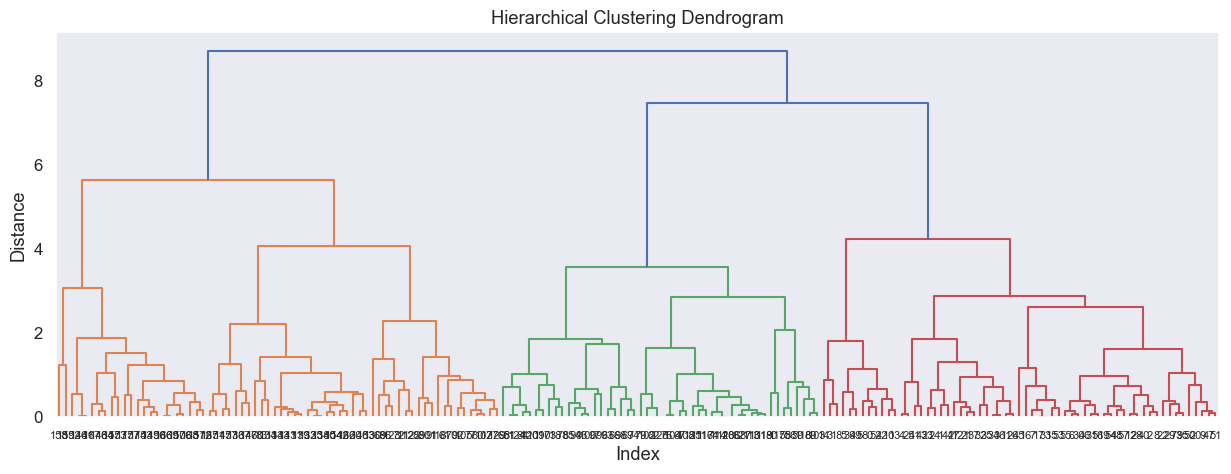

In [171]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    hcf,
    leaf_rotation=0.,
    leaf_font_size=8.,
)
plt.show()

In [172]:
h_complete = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(h_new_df) 

In [173]:
h_complete.labels_

array([4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [174]:
cluster_labels=pd.Series(h_complete.labels_)

In [175]:
df['clust']=cluster_labels

In [176]:
df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clust  
0           0.28             2.29   5.64  1.04      3.92     1065      4  
1           0.26             1.28   4.38  1.05      3.40     1050      3  
2           0.30             2.81   5.68  1.03      3.17     1185      3  
3           0.24             2.18   7.80  0.86      3.45     1480      4  
4           0.39             1.82   4.32  1.04      2.93      735      3

In [177]:
df.groupby(df.clust).mean()

Alcohol     Malic       Ash  Alcalinity   Magnesium   Phenols  \
clust                                                                    
0      12.686222  2.924000  2.380667   20.966667   95.000000  1.691556   
1      13.420435  3.390435  2.486087   21.847826  103.130435  1.777391   
2      12.238163  1.713061  2.165714   19.528571   92.061224  2.395510   
3      13.573265  2.016531  2.481429   18.069388  107.795918  2.758571   
4      14.150000  1.963333  2.435000   15.150000  109.500000  3.248333   

       Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  \
clust                                                                   
0        1.088222       0.469556         1.090889  4.613556  0.824578   
1        0.897826       0.428696         1.406522  9.203043  0.640000   
2        2.204694       0.318163         1.713061  2.992653  1.096327   
3        2.887551       0.296122         1.868980  5.175510  1.065510   
4        3.505833       0.276667         2.185000  6.735000  1.055833   

       Dilution      Proline  
clust                         
0      2.021111   571.444444  
1      1.640870   654.782609  
2      2.913265   509.755102  
3      3.166939  1055.551020  
4      3.188333  1289.333333